<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: This is what takes in the data that is being fed into the model. 
### Hidden Layer: This is where the neural network takes the input and processes it into the output given weights and biases.
### Output Layer: This is what comes out of the model, either a classification or a prediction value or set of values. 
### Neuron: This takes the inputs, multiplies them by the weights, and does the sum. This is basically what does the work for the hidden layers. 
### Weight: This is a measure of how important a feature is. The heavier the weight, the more important it is. 
### Activation Function: This defines the output of the neuron given a particular input. This is what is used to do the calculations. 
### Node Map: A diagram illustrating the different layers of a neural network. 
### Perceptron: A single-layer neural network. 


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

The flow of a neural network stars with both the input and the output when training. The network sees both the input data and the output classification or value and creates a network based on layers which interpret the data using the following: Weights, which give more or less importance to the features, biases, which are values that are created to account for values in the data that don't adhere exactly to a linear model (think of a sigmoid graph), and activation functions, which are the method used to construct the model, which can be linear or non-linear. 

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [56]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [57]:
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [58]:
print(df.shape)
df.head()

(4, 3)


,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [59]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return 1/(1 - sigmoid(x))

In [60]:
correct_output = np.array(df['y'])
correct_output

array([1, 1, 1, 0])

In [61]:
np.random.seed(42)
weights = np.random.random((2,4))
print(f'weights:\n {weights}\n')
print(df.iloc[::, [0,1]].shape, weights.shape, '\n')

inputs = df.iloc[::, [0,1]]
weighted_sum = np.dot(inputs, weights)
print(f'weighted_sum:\n {weighted_sum}\n')

activated_outputs = sigmoid(weighted_sum)
print(f'activated_outputs:\n {activated_outputs}\n')

error = correct_output - activated_outputs
print(f'error:\n {error}\n')

adjustments = error * sigmoid_derivative(activated_outputs)
print(f'adjustments:\n {adjustments}\n')

weights = weights + np.dot(inputs.T, adjustments)
print(f'weights:\n {weights}\n')



weights:
 [[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]]

(4, 2) (2, 4) 

weighted_sum:
 [[0.         0.         0.         0.        ]
 [0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.53055876 1.10670883 0.79007755 1.46483463]]

activated_outputs:
 [[0.5        0.5        0.5        0.5       ]
 [0.59255557 0.72125881 0.67524268 0.64534933]
 [0.53892573 0.53891974 0.51451682 0.70394941]
 [0.62961342 0.75151503 0.68784798 0.81227101]]

error:
 [[ 0.5         0.5         0.5        -0.5       ]
 [ 0.40744443  0.27874119  0.32475732 -0.64534933]
 [ 0.46107427  0.46108026  0.48548318 -0.70394941]
 [ 0.37038658  0.24848497  0.31215202 -0.81227101]]

adjustments:
 [[ 1.32436064  1.32436064  1.32436064 -1.32436064]
 [ 1.14435026  0.85211767  0.96274622 -1.87580654]
 [ 1.25143136  1.25144289  1.29761402 -2.12713912]
 [ 1.06555954  0.77532524  0.93315649 -2.64233285]]

weights:
 [[ 2.58444992  2.57

In [64]:

for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_output - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[ 11.21706391  11.21706801  11.21707498 -10.5981444 ]
 [ 11.21704343  11.21700392  11.21701622 -10.598124  ]]
Output after training
[[5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01]
 [9.99986557e-01 9.99986557e-01 9.99986557e-01 2.49629101e-05]
 [9.99986556e-01 9.99986556e-01 9.99986556e-01 2.49634191e-05]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 6.23190699e-10]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [265]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60000,0.62700,50,1
1,1,85,66,29,0,26.60000,0.35100,31,0
2,8,183,64,0,0,23.30000,0.67200,32,1
3,1,89,66,23,94,28.10000,0.16700,21,0
4,0,137,40,35,168,43.10000,2.28800,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [266]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split

feats = list(diabetes)[:-1]
target = 'Outcome'

# Setting X and y for classification
X = np.array(diabetes[feats])
# y = diabetes.iloc[::, -1].values
y = np.array(diabetes[target])

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# X = pd.DataFrame(X, columns=feats)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((691, 8), (77, 8), (691,), (77,))

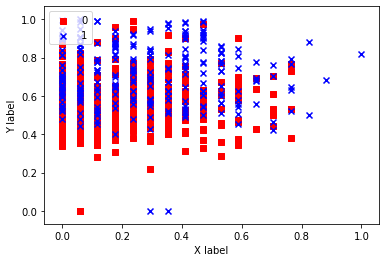

In [267]:
import matplotlib.pyplot as plt

def plot_scatter(X, y):
    colors = ["red","blue","black","yellow","green","purple","orange"]
    markers = ('s', 'x', 'o', '^', 'v')
    
    for i, yi in enumerate(np.unique(y)):
        Xi = X[y == yi]
        plt.scatter(Xi[:, 0], Xi[:, 1], color=colors[i], marker=markers[i], label=yi)
    
    plt.xlabel('X label')
    plt.ylabel('Y label')
    plt.legend(loc='upper left')

#Generate the Scatterplot
plot_scatter(X_train, y_train)

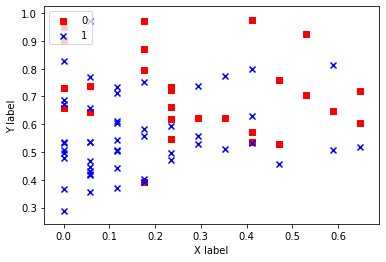

In [268]:
y_test = np.where(y_test == 0, 1, 0)
plot_scatter(X_test, y_test)

In [269]:
class Perceptron(object):
    def __init__(self, rate=0.01, niter=10, random_state=42):
        self.rate = rate
        self.niter = niter
        self.random_state = random_state
        self.errors = []
    
    def __sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        return 1/(1 - sigmoid(x))

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                predicted = self.predict(xi)
                delta_w = self.rate * (target - predicted)
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                if delta_w != 0.0:
                    err += 1
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

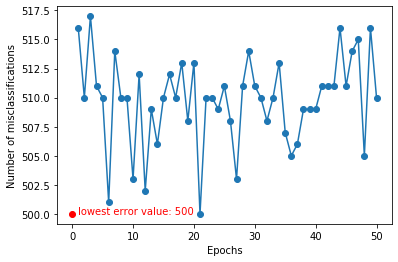

In [287]:
pn = Perceptron(0.1, 50)
pn.fit(X_train, y_train)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')

# Annotating lowest error
plt.text(x=1, y=min(pn.errors), s=f'lowest error value: {min(pn.errors)}', color='red')

# plotting training
plt.plot(min(pn.errors), color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?